### Inference Visualization

In [48]:
import os
import random
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from pycocotools.coco import COCO

test_json = COCO('/opt/ml/detection/dataset/test.json') # test.jon 경로
cate_info = test_json.dataset['categories']

# 카테고리 별 색깔 설정
cate_color = {0: 'red', 1:'orange', 2:'yellow', 3:'green', 4:'blue', 5:'pink', 6:'brown', 7:'purple', 8:'navy', 9:'white'}
# 카테고리 별 이름
cate_name = []
for j in range(10):
    cate_name.append(cate_info[j]['name'])
# print(cate_name)

# 폰트
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSans.ttf", 40)

submission_path = '/opt/ml/workspace/ensemble/results/ksh_7001.csv' # submission.csv 경로
submission = pd.read_csv(submission_path)
# submission['PredictionString'].info

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [41]:
# import pandas as pd
# from pycocotools.coco import COCO

# df = pd.read_csv('/opt/ml/workspace/ensemble/ych_ksh_ensemble_WBF4.csv')
# image_ids = df['image_id'].tolist()
# len(image_ids)
# annotation = '/opt/ml/detection/dataset/test.json'
# coco = COCO(annotation)
# for i, image_id in enumerate(image_ids):
#     predict_string = df[df['image_id'] == image_id]['PredictionString'].tolist()[0]

4869

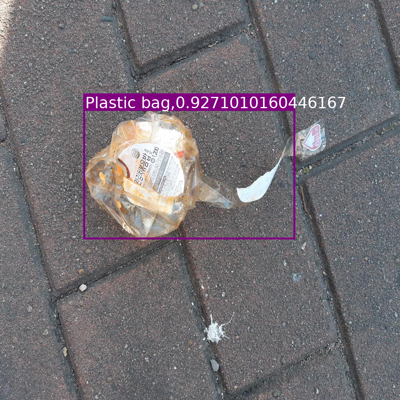

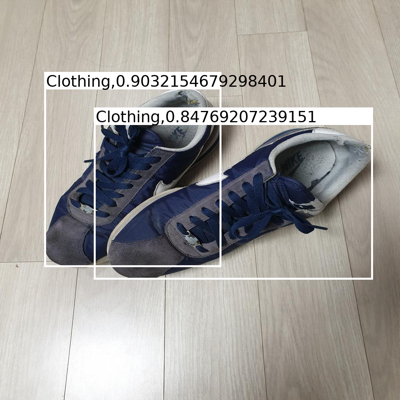

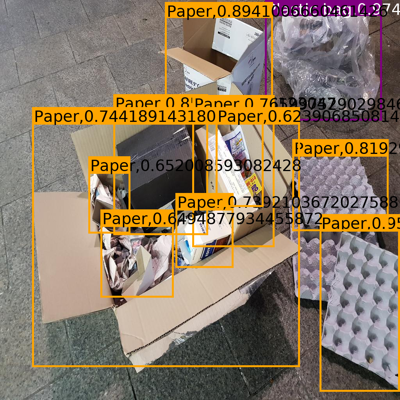

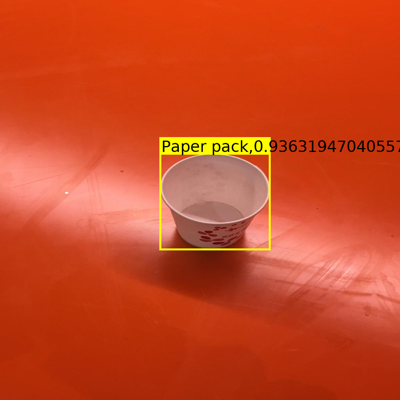

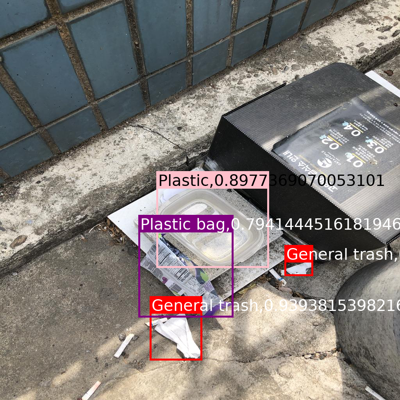

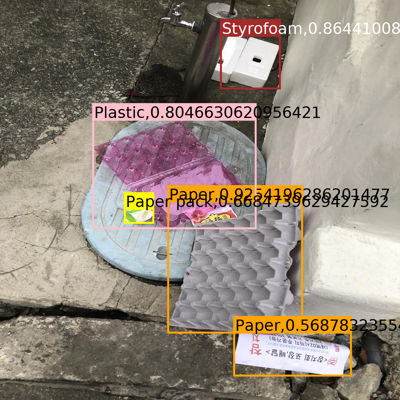

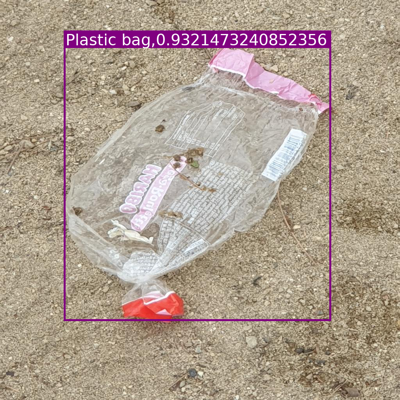

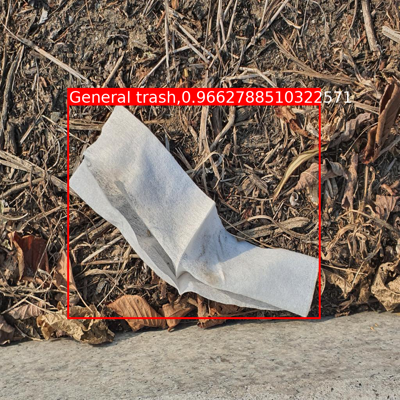

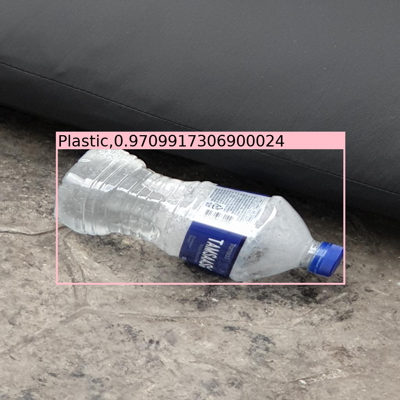

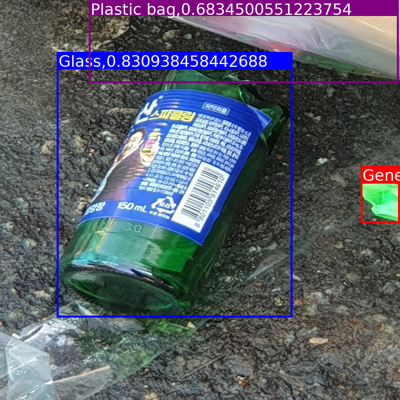

In [56]:
data_dir = '/opt/ml/detection/dataset'
for _ in range(10): # 10개 뽑아내기
    ran_num = random.randint(0, 4870) # random 숫자 
    test_image = submission.iloc[ran_num]['image_id']
    infos = submission.iloc[ran_num]['PredictionString']
    if type(infos) == str:
        bbox_info = infos.split()
    else:
        continue
    # print(bbox_info)

    bboxes = []
    for i, v in enumerate(bbox_info):
        if i % 6 == 0:
            bboxes.append([])
        bboxes[-1].append(float(v))

    img = Image.open(os.path.join(data_dir, test_image))
    draw = ImageDraw.Draw(img)
    # bboxes의 리스트들은 label, score, xmin, ymin, xmax, ymax 순서
    for idx in range(len(bboxes)):
        if bboxes[idx][1] > 0.5: # score 높은 것만 골라 시각화 (전부 보고 싶으면 0)
            [xmin, ymin, xmax, ymax] = bboxes[idx][2:]
            draw.rectangle((xmin, ymin, xmax, ymax), outline=cate_color[int(bboxes[idx][0])], width = 5)
            # text box는 bounding box 위에 그리기
            # 만약 bounding box위에 text box 그릴 수 없으면 안 쪽에 그리기
            y_pos = ymin-40
            if ymin < 40:
                y_pos = ymin
            draw.rectangle((xmin, y_pos, xmax, y_pos+40), fill=cate_color[int(bboxes[idx][0])], width = 5)
            # text_color
            if int(bboxes[idx][0]) in [1, 2, 5, 9]:
                text_color = 'black'
            else:
                text_color = 'white'
            # text 위치
            text_pos = (xmin+5, y_pos)
            draw.text(text_pos, f'{cate_name[int(bboxes[idx][0])]},{bboxes[idx][1]}', fill=text_color, font=font)

    img_small = img.resize((400, 400))
    img_small.show()